In [1]:
import glob
import math
import sys
import timeit

sys.path.insert(0, '../../')
from visualize_dataset import *
from losses import *
from metrics import *
from predict import *
from train import *
from utils import *

Using TensorFlow backend.


In [2]:
path_train_images = '../../../data/stanford_max_lesion_area_fused_cropped/train/Slice/'
path_train_annotations = '../../../data/stanford_max_lesion_area_fused_cropped/train/ROI/'
path_train_predictions = './predictions.50e/train/'

path_val_images = '../../../data/stanford_max_lesion_area_fused_cropped/val/Slice/'
path_val_annotations = '../../../data/stanford_max_lesion_area_fused_cropped/val/ROI/'
path_val_predictions = './predictions.50e/val/'

path_test_images = '../../../data/stanford_max_lesion_area_fused_cropped/test/Slice/'
path_test_annotations = '../../../data/stanford_max_lesion_area_fused_cropped/test/ROI/'
path_test_predictions = './predictions.50e/test/'

path_save_weights = './weights.50e/'
path_load_weights = None

train_vgg = False
path_vgg_weights = '../../../data/vgg16_weights_th_dim_ordering_th_kernels.h5'

n_classes = 2
input_height = 224
input_width = 224
n_channel_annotations = 1

In [3]:
print('Number train images: ', len(glob.glob(path_train_images + '*.png')))
print('Number val images: ', len(glob.glob(path_val_images + '*.png')))
print('Number test images: ', len(glob.glob(path_test_images + '*.png')))

Number train images:  376
Number val images:  15
Number test images:  14


In [4]:
model_name = 'vgg_unet_padded'
epochs = 50
train_batch_size = 8
val_batch_size = len(glob.glob(path_val_images + '*.png'))

In [5]:
optimizer = 'adadelta'
metrics = ['accuracy', dice, iou]

class_props = calc_class_proportions(path_train_annotations, n_classes, n_channel_annotations)
class_weights = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations)
class_weights_log = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations, scale = 'log')

print(class_props)
print(class_weights)
print(class_weights_log)

loss = weighted_categorical_crossentropy_loss(class_weights_log)

[0.97803434 0.02196566]
[ 1.         44.52560761]
[0.0222105  3.81827497]


Model output shape (None, 50176, 2)
Epoch 0
Epoch 1/1
47/47 [==============================] - 1593s 34s/step - loss: 0.0714 - acc: 0.9437 - dice: 8.2099e-04 - iou: 4.1636e-04 - val_loss: 0.0554 - val_acc: 0.9755 - val_dice: 0.0000e+00 - val_iou: 0.0000e+00
Epoch 1
Epoch 1/1
47/47 [==============================] - 1607s 34s/step - loss: 0.0552 - acc: 0.9351 - dice: 0.0017 - iou: 8.7957e-04 - val_loss: 0.0477 - val_acc: 0.9829 - val_dice: 0.0000e+00 - val_iou: 0.0000e+00
Epoch 2
Epoch 1/1
47/47 [==============================] - 1610s 34s/step - loss: 0.0413 - acc: 0.8181 - dice: 8.0814e-04 - iou: 4.0669e-04 - val_loss: 0.0327 - val_acc: 0.3071 - val_dice: 0.0018 - val_iou: 9.2340e-04
Epoch 3
Epoch 1/1
47/47 [==============================] - 1606s 34s/step - loss: 0.0280 - acc: 0.2862 - dice: 0.0024 - iou: 0.0012 - val_loss: 0.0417 - val_acc: 0.1441 - val_dice: 0.0111 - val_iou: 0.0056
Epoch 4
Epoch 1/1
47/47 [==============================] - 1611s 34s/step - loss: 0.0258 - acc: 0.29

47/47 [==============================] - 849s 18s/step - loss: 0.0052 - acc: 0.0494 - dice: 8.6286e-05 - iou: 4.3150e-05 - val_loss: 0.4901 - val_acc: 0.0394 - val_dice: 0.0183 - val_iou: 0.0092
Epoch 39
Epoch 1/1
47/47 [==============================] - 849s 18s/step - loss: 0.0054 - acc: 0.0513 - dice: 1.2941e-04 - iou: 6.4737e-05 - val_loss: 0.4178 - val_acc: 0.0517 - val_dice: 0.0184 - val_iou: 0.0093
Epoch 40
Epoch 1/1
47/47 [==============================] - 849s 18s/step - loss: 0.0107 - acc: 0.1187 - dice: 1.8515e-04 - iou: 9.2686e-05 - val_loss: 0.0484 - val_acc: 0.1215 - val_dice: 0.0119 - val_iou: 0.0060
Epoch 41
Epoch 1/1
47/47 [==============================] - 848s 18s/step - loss: 0.0062 - acc: 0.0666 - dice: 1.3993e-04 - iou: 6.9978e-05 - val_loss: 0.4406 - val_acc: 0.0455 - val_dice: 0.0183 - val_iou: 0.0092
Epoch 42
Epoch 1/1
47/47 [==============================] - 842s 18s/step - loss: 0.0044 - acc: 0.0400 - dice: 6.9244e-05 - iou: 3.4625e-05 - val_loss: 0.3911 - va

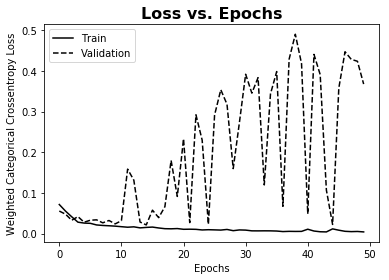

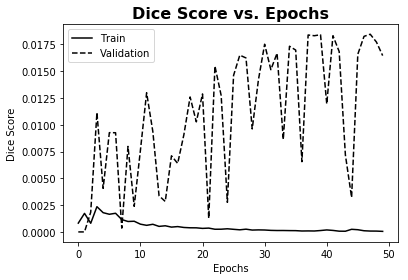

In [6]:
start = timeit.default_timer()
train(
    path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights, path_vgg_weights = path_vgg_weights, train_vgg = train_vgg, path_load_weights = None
)
end = timeit.default_timer()

In [7]:
print('Total training time: ', end - start)

Total training time:  62109.264220070996


In [9]:
epochs = 48

In [10]:
predict(
    path_train_images, path_train_annotations, path_train_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.63      0.03      0.06  18491024
           1       0.00      0.00      0.00    375152

   micro avg       0.03      0.03      0.03  18866176
   macro avg       0.31      0.02      0.03  18866176
weighted avg       0.61      0.03      0.06  18866176

F1/dice (binary):  2.3797974715584046e-05
Jaccard/IOU:  1.1899128945376912e-05


In [ ]:
visualize_dataset(
    path_train_images, path_train_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_train_predictions
)

In [12]:
predict(
    path_val_images, path_val_annotations, path_val_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.83      0.04      0.08    739775
           1       0.01      0.52      0.02     12865

   micro avg       0.05      0.05      0.05    752640
   macro avg       0.42      0.28      0.05    752640
weighted avg       0.82      0.05      0.08    752640

F1/dice (binary):  0.018455054561219143
Jaccard/IOU:  0.009313467556564845


In [ ]:
visualize_dataset(
    path_val_images, path_val_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_val_predictions
)

In [14]:
predict(
    path_test_images, path_test_annotations, path_test_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.74      0.05      0.10    686571
           1       0.00      0.17      0.01     15893

   micro avg       0.06      0.06      0.06    702464
   macro avg       0.37      0.11      0.05    702464
weighted avg       0.72      0.06      0.10    702464

F1/dice (binary):  0.0080905591678282
Jaccard/IOU:  0.0040617103378194535


In [ ]:
visualize_dataset(
    path_test_images, path_test_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations, 
    dir_predictions = path_test_predictions
)